In [12]:
import pandas as pd
import numpy as np

df1 = pd.read_csv(usecols=['datetime_beginning_ept', 'mw'], parse_dates=['datetime_beginning_ept'], filepath_or_buffer='hrl_load_metered - 20170201-20200131.csv')

In [13]:
df2=pd.read_csv(usecols=['DATE', 'HourlyDryBulbTemperature'],parse_dates=['DATE'], filepath_or_buffer='hr_temp_20170201-20200131_subset.csv', date_parser = lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))
df2['DATE'] = df2['DATE'].dt.floor('h')
df2.columns=['DATE', 'temperature']

In [14]:
df2.dtypes

DATE           datetime64[ns]
temperature           float64
dtype: object

In [15]:
df2['weekday'] = df2['DATE'].dt.dayofweek
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
df2['hour'] = df2['DATE'].dt.hour
df2

,DATE,temperature,weekday,year,month,hour
0,2017-02-01 00:00:00,37.0,2,2017,2,0
1,2017-02-01 01:00:00,37.0,2,2017,2,1
2,2017-02-01 02:00:00,36.0,2,2017,2,2
3,2017-02-01 03:00:00,36.0,2,2017,2,3
4,2017-02-01 04:00:00,36.0,2,2017,2,4
...,...,...,...,...,...,...
26275,2020-01-31 19:00:00,34.0,4,2020,1,19
26276,2020-01-31 20:00:00,33.0,4,2020,1,20
26277,2020-01-31 21:00:00,33.0,4,2020,1,21
26278,2020-01-31 22:00:00,33.0,4,2020,1,22


In [16]:
df = df2.merge(df1, right_on='datetime_beginning_ept', left_on='DATE')

In [17]:
df = df.drop('datetime_beginning_ept', 1)

In [18]:
df = df.interpolate(method ='linear', limit_direction ='forward') 

In [19]:
df_test = df[df['year'] >= 2020]
df_train = df[df['year'] < 2020]

In [20]:
df_test

,DATE,temperature,weekday,year,month,hour,mw
25536,2020-01-01 00:00:00,31.0,2,2020,1,0,1363.428
25537,2020-01-01 01:00:00,29.0,2,2020,1,1,1335.975
25538,2020-01-01 02:00:00,30.0,2,2020,1,2,1296.817
25539,2020-01-01 03:00:00,30.0,2,2020,1,3,1288.403
25540,2020-01-01 04:00:00,31.0,2,2020,1,4,1292.263
...,...,...,...,...,...,...,...
26275,2020-01-31 19:00:00,34.0,4,2020,1,19,1618.484
26276,2020-01-31 20:00:00,33.0,4,2020,1,20,1580.925
26277,2020-01-31 21:00:00,33.0,4,2020,1,21,1545.354
26278,2020-01-31 22:00:00,33.0,4,2020,1,22,1478.832


In [21]:
df_train

,DATE,temperature,weekday,year,month,hour,mw
0,2017-02-01 00:00:00,37.0,2,2017,2,0,1419.881
1,2017-02-01 01:00:00,37.0,2,2017,2,1,1379.505
2,2017-02-01 02:00:00,36.0,2,2017,2,2,1366.106
3,2017-02-01 03:00:00,36.0,2,2017,2,3,1364.453
4,2017-02-01 04:00:00,36.0,2,2017,2,4,1391.265
...,...,...,...,...,...,...,...
25531,2019-12-31 19:00:00,32.0,1,2019,12,19,1606.134
25532,2019-12-31 20:00:00,32.0,1,2019,12,20,1565.014
25533,2019-12-31 21:00:00,32.0,1,2019,12,21,1515.905
25534,2019-12-31 22:00:00,30.0,1,2019,12,22,1474.519


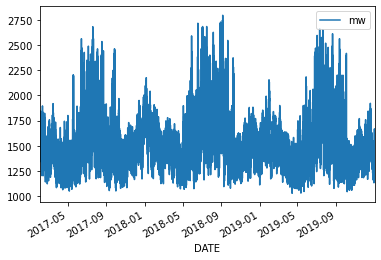

In [22]:
df_train.plot(x='DATE', y='mw')

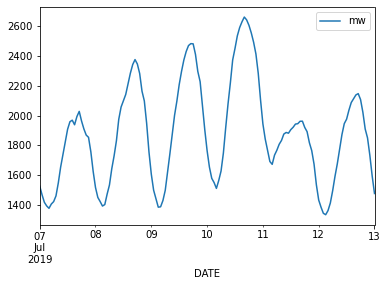

In [23]:
df_train[(df_train['DATE']>='2019-07-07') & (df_train['DATE']<='2019-07-13') ].plot(x='DATE',y='mw')

It seems better to normalize data to better compare patterns in temperature and energy

NameError: name 'plt' is not defined

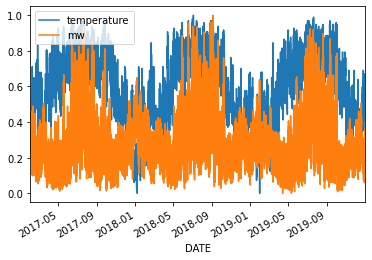

In [24]:
df_train_n=df_train.copy()
df_train_n['mw']=(df['mw']-df['mw'].min())/(df['mw'].max()-df['mw'].min())
df_train_n['temperature']=(df['temperature']-df['temperature'].min())/(df['temperature'].max()-df['temperature'].min())
ax1=df_train_n.plot(x='DATE', y='temperature')
df_train_n.plot(ax=ax1, x='DATE', y='mw')
plt.show()

One week in July...

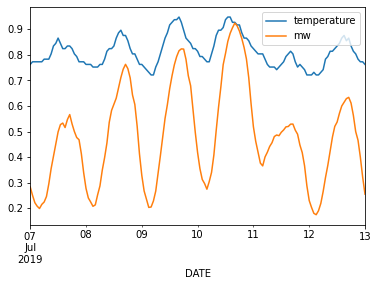

In [25]:
ax1=df_train_n[(df_train_n['DATE']>='2019-07-07') & (df_train_n['DATE']<='2019-07-13') ].plot(x='DATE',y='temperature')
df_train_n[(df_train_n['DATE']>='2019-07-07') & (df_train_n['DATE']<='2019-07-13') ].plot(ax=ax1,x='DATE',y='mw')

One week in January...

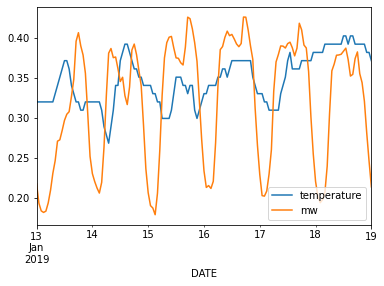

In [26]:
ax1=df_train_n[(df_train_n['DATE']>='2019-01-13') & (df_train_n['DATE']<='2019-01-19') ].plot(x='DATE',y='temperature')
df_train_n[(df_train_n['DATE']>='2019-01-13') & (df_train_n['DATE']<='2019-01-19') ].plot(ax=ax1,x='DATE',y='mw')

Correlation between temperature and energy

In [27]:
df_train['temperature'].corr(df['mw'])

0.3230255776667495

Scatterplot between temperature and energy

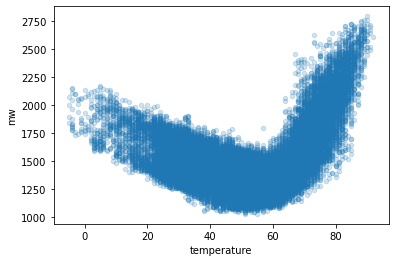

In [28]:
df_train.plot(kind='scatter',x='temperature',y='mw',alpha=0.2)

In [29]:
df_train[['mw', 'temperature']]

,mw,temperature
0,1419.881,37.0
1,1379.505,37.0
2,1366.106,36.0
3,1364.453,36.0
4,1391.265,36.0
...,...,...
25531,1606.134,32.0
25532,1565.014,32.0
25533,1515.905,32.0
25534,1474.519,30.0


In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Calculation of regression model including only temperature and its quadratic term

In [31]:
mean=df_train['temperature'].mean()
std=df_train['temperature'].std()
df_train_std=df_train.copy()
df_train_std['temperature']=(df_train['temperature']-mean)/std
df_train_std['temperaturesq']=df_train_std['temperature']**2
model = ols('mw ~ temperature + temperaturesq', data=df_train_std)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 1.562e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:13:51   Log-Likelihood:            -1.7052e+05
No. Observations:               25536   AIC:                         3.411e+05
Df Residuals:                   25533   BIC:                         3.411e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1378.4863      1.659    831.031

Scatter plot between energy and temperature, for the months of January and July

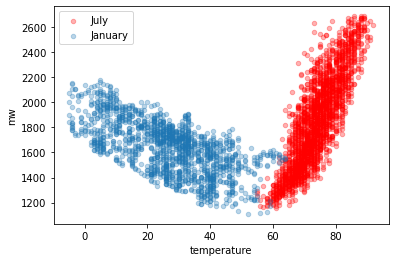

In [32]:
df_train_july=df_train[df_train['month']==7]
df_train_january=df_train[df_train['month']==1]
axs1=df_train_july.plot(kind='scatter',x='temperature',y='mw',alpha=0.3,color='red',label='July')
df_train_january.plot(ax=axs1,kind='scatter',x='temperature',y='mw',alpha=0.3,label='January')

Scatter plot between energy and temperature, for the hours of midnight and noon

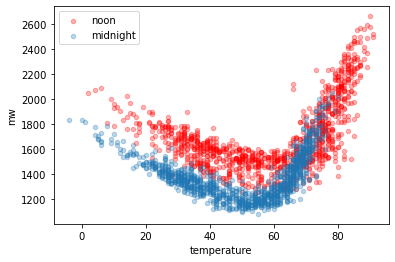

In [33]:
df_train_noon=df_train[df_train['hour']==12]
df_train_midnight=df_train[df_train['hour']==0]
axs2=df_train_noon.plot(kind='scatter',x='temperature',y='mw',alpha=0.3,color='red',label='noon')
df_train_midnight.plot(ax=axs2,kind='scatter',x='temperature',y='mw',alpha=0.3,label='midnight')

New regression model adding month and hour of day categorical variables

In [34]:
model2 = ols('mw ~ temperature + temperaturesq + C(month) + C(hour)', data=df_train_std)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2585.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:13:56   Log-Likelihood:            -1.6110e+05
No. Observations:               25536   AIC:                         3.223e+05
Df Residuals:                   25499   BIC:                         3.226e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1290.2095      5.966    216.

And another one with including also weekday...

In [35]:
model3 = ols('mw ~ temperature + temperaturesq + C(month) + C(hour) + C(weekday)', data=df_train_std)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2770.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:13:57   Log-Likelihood:            -1.5881e+05
No. Observations:               25536   AIC:                         3.177e+05
Df Residuals:                   25493   BIC:                         3.181e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1308.3164      5.747    2

MAPE calculation for training set

In [36]:
mwpred0 = results3.predict(df_train_std)
mape0=((df_train_std['mw']-mwpred0)/df_train_std['mw']).abs().mean()
mape0

0.05830404496182264

Preparing test data set for preditions calculation

In [37]:
df_test_std=df_test.copy()
df_test_std['temperature']=(df_test['temperature']-mean)/std
df_test_std['temperaturesq']=df_test_std['temperature']**2

Predictions and plot for the test set

0.04417872794966245

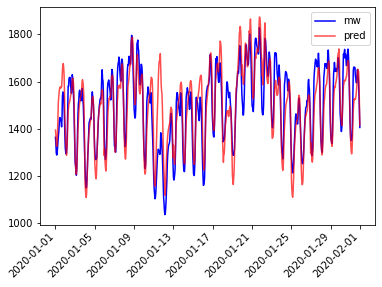

In [39]:
import matplotlib.pyplot as plt
mwpred3 = results3.predict(df_test_std)
fig, ax = plt.subplots()
ax.plot(df_test_std['DATE'], df_test_std['mw'], color='blue', label="mw")
ax.plot(df_test_std['DATE'], mwpred3, color='red', label="pred", alpha=0.7)
ax.legend(loc="best");
plt.xticks(rotation=45,ha='right')
mape3=((df_test_std['mw']-mwpred3)/df_test_std['mw']).abs().mean()
mape3

Same forecast using model that does not include weekdays, we expect MAPE to be a little be worse...

0.05385583438444677

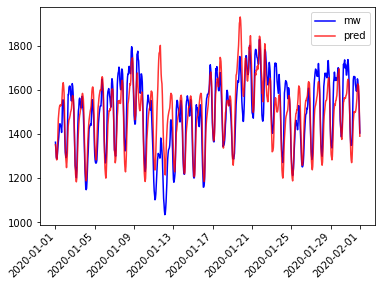

In [40]:
mwpred2 = results2.predict(df_test_std)
fig, ax = plt.subplots()
ax.plot(df_test_std['DATE'], df_test_std['mw'], color='blue', label="mw")
ax.plot(df_test_std['DATE'], mwpred2, color='red', label="pred", alpha=0.8)
ax.legend(loc="best");
plt.xticks(rotation=45,ha='right')
mape2=((df_test_std['mw']-mwpred2)/df_test_std['mw']).abs().mean()
mape2

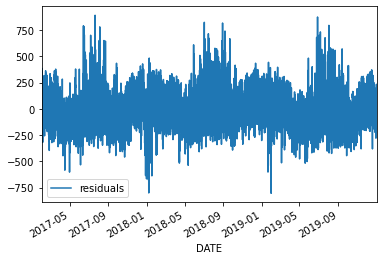

In [80]:
mwpred_res = results.predict(df_train_std)
mwpredtest_res = results.predict(df_test_std)
df_train_std['residuals']=df_train_std['mw']-mwpred_res
df_test_std['residuals']=df_test_std['mw']-mwpredtest_res
df_train_std.plot(x='DATE',y='residuals')

Residuals for first week Dec 2019

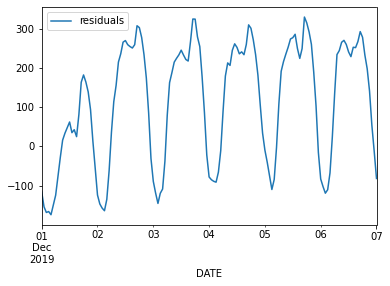

In [94]:
df_train_std[(df_train_std['DATE']>='2019-12-01') & (df_train_n['DATE']<='2019-12-07') ].plot(x='DATE',y='residuals')

Exponential smoothing model

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
fit1 = ExponentialSmoothing(df_train_std['residuals'], seasonal_periods=24, seasonal='add').fit()
pred_res = fit1.predict(0)

/usr/lib64/python3.8/site-packages/statsmodels/tsa/holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
/usr/lib64/python3.8/site-packages/statsmodels/tsa/holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Training data set MAPE for exponential smoothing model

In [83]:
mwpred_plus_res = results.predict(df_train_std) + pred_res
mape_res=((df_train_std['mw']-mwpred_plus_res)/df_train_std['mw']).abs().mean()
mape_res

0.02110141102080616

In [88]:
mwpred_test_plus_res=results.predict(df_test_std)+fit1.predict(start=df_test_std.index[0], end=df_test_std.index[-1])
mape_test_res=((df_test_std['mw']-mwpred_test_plus_res)/df_test_std['mw']).abs().mean()
mape_test_res

0.0835319685061575

SARIMA model

In [90]:
fit2 = SARIMAX(df_train_std['residuals'], order=(2,0,0), seasonal_order=(0,1,1,24)).fit()
pred_res2 = fit2.predict(0)

Training data set MAP for SARIMA model

In [91]:
mwpred2_plus_res = results.predict(df_train_std) + pred_res2
mape_res2=((df_train_std['mw']-mwpred2_plus_res)/df_train_std['mw']).abs().mean()
mape_res2

0.016497154552386838

In [92]:
mwpred2_test_plus_res=results.predict(df_test_std)+fit2.predict(start=df_test_std.index[0], end=df_test_std.index[-1])
mape_test_res2=((df_test_std['mw']-mwpred2_test_plus_res)/df_test_std['mw']).abs().mean()
mape_test_res2

0.05549787112202148

Ensemble model MAPE

In [93]:
mwpred3_plus_res = results.predict(df_train_std) + (pred_res2 + pred_res) / 2
mape_res3=((df_train_std['mw']-mwpred3_plus_res)/df_train_std['mw']).abs().mean()
mape_res3

0.017906659844385546